In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## data wrangling

In [19]:
df = pd.read_csv("section_relevance_T5.csv")
df.rename({"Unnamed: 0":"position"}, axis=1, inplace=True)
df = pd.melt(df, id_vars=['position', 'original'], value_vars=[f"paraphrase{i+1}" for i in range(5)], var_name='paraphrase', value_name='sci_sentence')
df['paraphrase'] = pd.to_numeric(df['paraphrase'].apply(lambda x: x.replace("paraphrase","")))
df = df.sort_values(by=["position", "paraphrase"]).reset_index(drop=True)
df.head()
df.to_csv("section_relevance_T5_melted.csv", index=False)

## visualize

In [38]:
df = pd.read_excel("section_relevance_T5_melted.xlsx")

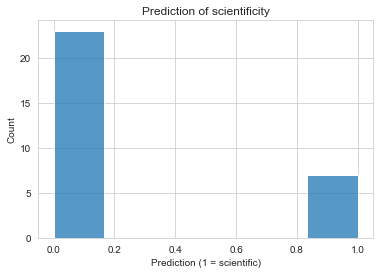

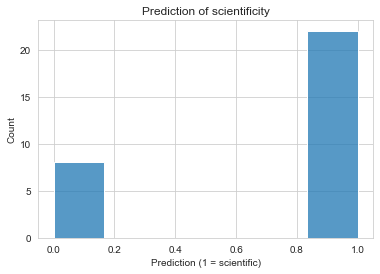

In [40]:
ax = sns.histplot(data=df, x="sci_sentence_style_svm")
ax.set_title(f"Prediction of scientificity")
ax.set_xlabel("Prediction (1 = scientific)")
plt.show()

ax = sns.histplot(data=df, x="sci_pred_label")
ax.set_title(f"Prediction of scientificity")
ax.set_xlabel("Prediction (1 = scientific)")
plt.show()

#plt.savefig(os.path.join("plots","val_student_reports.png"), facecolor='white', dpi=300)

In [42]:
df.head(2)

,position,original,paraphrase,sci_sentence,sci_merged,original_style_svm,sci_sentence_style_svm,original_masked,sci_masked,orig_pred_label,orig_prob0,orig_prob1,orig_prob_max,sci_pred_label,sci_prob0,sci_prob1,sci_prob_max,chosen,comment
0,0,The recent significant increase in publicly av...,1,"it highlights the importance of the field, as ...",1,0,0,The recent significant increase in publicly av...,"it highlights the importance of the field, as ...",0,0.900127,0.099873,0.900127,1,0.008072,0.991928,0.991928,0,NaN
1,0,The recent significant increase in publicly av...,2,a recent major increment in publicly available...,2,0,1,The recent significant increase in publicly av...,a recent major increment in publicly available...,0,0.900127,0.099873,0.900127,1,0.003236,0.996764,0.996764,0,NaN


In [50]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [55]:
plot_confusion_matrix(confusion_matrix(df.sci_sentence_style_svm, df.sci_pred_label),df.sci_sentence_style_svm, df.sci_pred_label)

ValueError: plot_confusion_matrix only supports classifiers

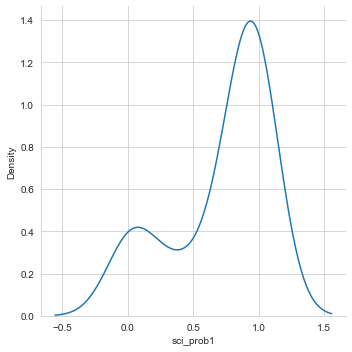

In [48]:
sns.displot(df, x="sci_prob1", kind="kde")